### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [74]:
data = pd.read_csv('data/coupons.csv')

In [75]:
data.head(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [96]:
#get rid of car column, not enough non-null entries
df = data.drop(columns=['car'])

#drop all rows with NaN values
df = df.dropna()

#change age to have all numerical values and be integers
df['age'] = df['age'].replace('50plus', '51').replace('below21', '20')
df['age'] = df['age'].astype(int)

#change Bar to have all numerical values and be integers
df['Bar'] = df['Bar'].replace('never', '0').replace('less1', '1').replace('1~3', '3').replace('4~8', '8').replace('gt8', '9')
df['Bar'] = df['Bar'].astype(int)

#change RestaurantLessThan20 to have all numerical values and be integers
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].replace('never', '0').replace('less1', '1').replace('1~3', '3').replace('4~8', '8').replace('gt8', '9')
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].astype(int)

#turn Y into strings for ease when graphing
df['Y'] = df['Y'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  int32 
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  int32 
 15  CoffeeHouse           12079 non-null  ob

4. What proportion of the total observations chose to accept the coupon? 



In [98]:
total_accepted = df[df['Y'] == '1'].size
total_ratio = total_accepted / df.size
print("Ratio of total observations that accepted coupon: ", total_ratio)

Ratio of total observations that accepted coupon:  0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

[Text(0.5, 0, 'Coupon Type'), Text(0.5, 1.0, 'Acceptance by Coupon Type')]

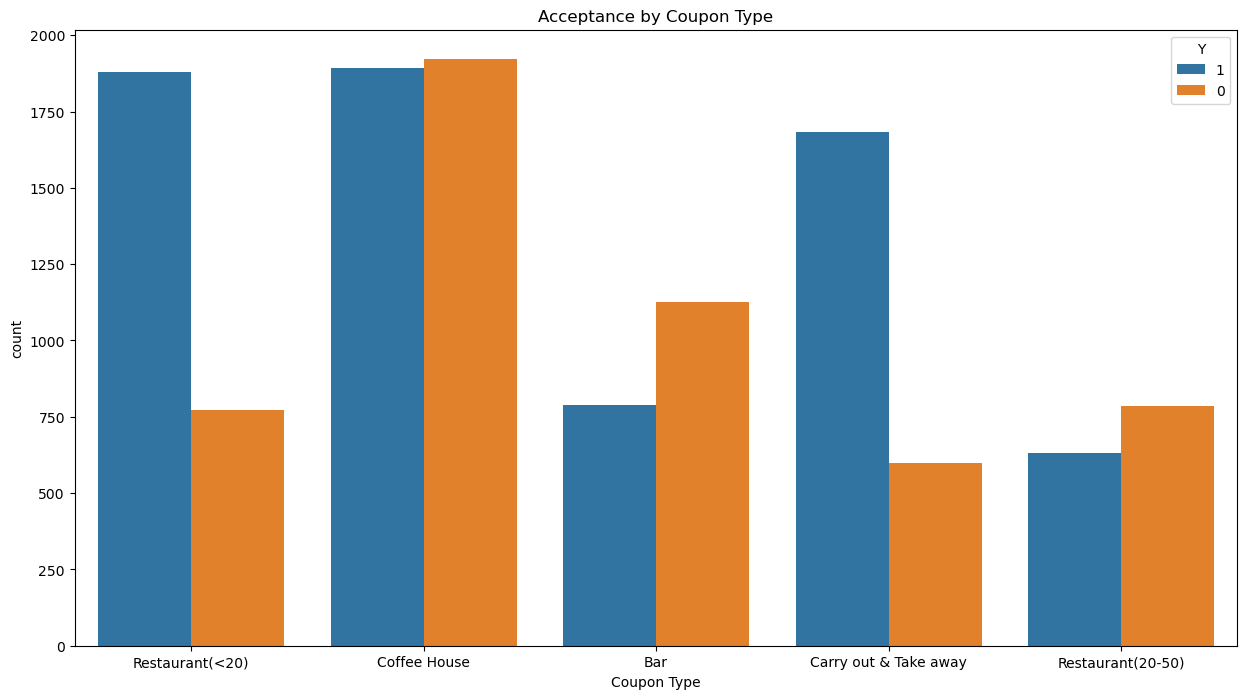

In [99]:
plt.figure(figsize=(15,8))
fig = sns.countplot(df, x="coupon", hue="Y")
fig.set(xlabel='Coupon Type', title='Acceptance by Coupon Type')

6. Use a histogram to visualize the temperature column.

C:\Users\anthony\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Temperature')

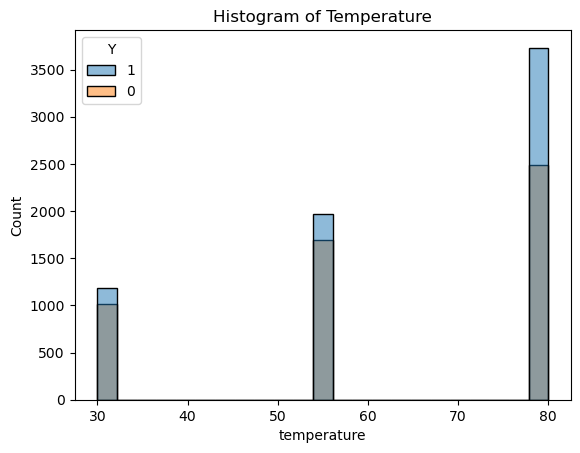

In [129]:
fig = sns.histplot(data=df, x='temperature', hue='Y')
fig.set_title('Histogram of Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [101]:
bar_data = df.loc[df['coupon'] == 'Bar']
bar_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [102]:
total_accepted_bar = bar_data[bar_data['Y'] == '1'].size
total_ratio_bar = total_accepted_bar / bar_data.size

print("Ratio of total observations that accepted coupon: ", total_ratio_bar)

Ratio of total observations that accepted coupon:  0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [83]:
#create lists for filtering data
less_visits = [0, 1, 3]
more_visits = [8, 9]
less_df = bar_data.query('Bar in @less_visits')
more_df = bar_data.query('Bar in @more_visits')

#find accepted count for each filter
less_accepted = less_df[less_df['Y'] == '1'].size
more_accepted = more_df[more_df['Y'] == '1'].size

#calculate ratio using accepted count and df size
less_accepted_ratio = less_accepted / less_df.size
more_accepted_ratio = more_accepted / more_df.size

print('Ratio of observations that accepted coupon when visiting a bar 3 or fewer times a month: ', less_accepted_ratio)
print('Ratio of observations that accepted coupon when visiting a bar more than 3 times a month: ', more_accepted_ratio)

Ratio of observations that accepted coupon when visiting a bar 3 or fewer times a month:  0.37267441860465117
Ratio of observations that accepted coupon when visiting a bar more than 3 times a month:  0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [84]:
#create visit list for filtering data
visits = [3, 8, 9]
multiple_over_25 = bar_data.query('Bar in @visits and age > 25')

accepted_multiple_over_25 = multiple_over_25[multiple_over_25['Y'] == '1'].size
ratio_visit_multiple_over_25 = accepted_multiple_over_25 / multiple_over_25.size
print("Ratio of observations that accepted coupon when visiting a bar more than once a month and over 25 yrs old: ", ratio_visit_multiple_over_25)

Ratio of observations that accepted coupon when visiting a bar more than once a month and over 25 yrs old:  0.6898263027295285


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [85]:
occupations = ['Farming Fishing & Forestry']
passenger = ['Kid(s)']
visit_nokid_nofarming = bar_data.query('Bar in @visits and occupation not in @occupations and passanger not in @passenger')

accepted_visit_nokid_nofarming = visit_nokid_nofarming[visit_nokid_nofarming['Y'] == '1'].size
visit_nokid_nofarming_ratio = accepted_visit_nokid_nofarming / visit_nokid_nofarming.size
print('Ratio when visiting more than once a month, no kid as passenger, and not in farming/fishing/forestry: ', visit_nokid_nofarming_ratio)

Ratio when visiting more than once a month, no kid as passenger, and not in farming/fishing/forestry:  0.7094339622641509


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [86]:
widowed = ['Widowed']

visit_nokid_married = bar_data.query('Bar in @visits and passanger not in @passenger and maritalStatus not in @widowed')
accepted_visit_nokid_married = visit_nokid_married[visit_nokid_married['Y'] == '1'].size
accepted_visit_nokid_married_ratio = accepted_visit_nokid_married / visit_nokid_married.size

print('Ratio when visiting more than once a month, no kid as passenger, and not widowed: ', accepted_visit_nokid_married_ratio)

Ratio when visiting more than once a month, no kid as passenger, and not widowed:  0.7094339622641509


In [87]:
visit_under_30 = bar_data.query('Bar in @visits and age < 30')
accepted_visit_under_30 = visit_under_30[visit_under_30['Y'] == '1'].size
accepted_visit_under_30_ratio = accepted_visit_under_30 / visit_under_30.size

print('Ratio when visiting more than once a month and under 30: ', accepted_visit_under_30_ratio)

Ratio when visiting more than once a month and under 30:  0.7195121951219512


In [90]:
incomes = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
eat_cheap_low_income = bar_data.query('RestaurantLessThan20 in @more_visits and income in @incomes')
accepted_eat_cheap_low_income = eat_cheap_low_income[eat_cheap_low_income['Y'] == '1'].size
accepted_eat_cheap_low_income_ratio = accepted_eat_cheap_low_income / eat_cheap_low_income.size

print('Ratio when visiting cheap restaurants more than 4 times a month and income is less than 50k: ', accepted_eat_cheap_low_income_ratio)

Ratio when visiting cheap restaurants more than 4 times a month and income is less than 50k:  0.45645645645645644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

[Text(0.5, 0, 'Monthly Bar Visits'),
 Text(0.5, 1.0, 'Acceptance of Bar Coupons by Monthly Visits')]

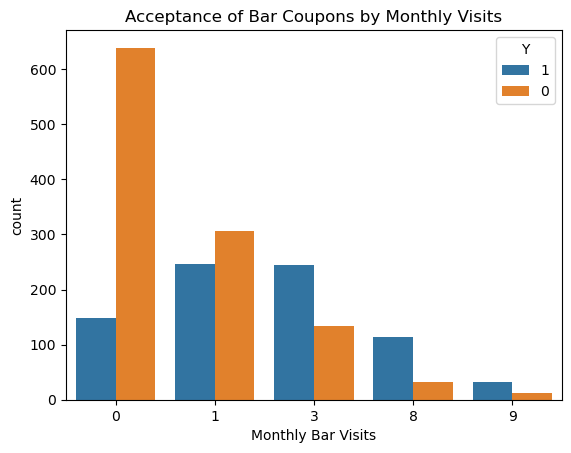

In [94]:
fig = sns.countplot(bar_data, x='Bar', hue='Y')
fig.set(xlabel='Monthly Bar Visits', title='Acceptance of Bar Coupons by Monthly Visits')

Based on the evidence gathered with the previous exercises, we can clearly see that bar visits has a large impact on the rate of coupon acceptance. Increasing amounts of monthly bar visits is shown in the above graph to dramatically increase the ratio of those who accept a bar coupon versus those who don't. We also explored the effect that family can have on the acceptance. For example, we can see that having no children present in the vehicle is also a contributing factor. Observations where the individual was under 30 was another considerable influence.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [107]:
#Filter data down to coffee house coupons
coffee_data = df[df['coupon'] == 'Coffee House']
coffee_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,9,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,9,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,8,1~3,1,1,0,0,1,0


In [113]:
#clean the coffee house column
coffee_data['CoffeeHouse'] = coffee_data['CoffeeHouse'].replace('never', '0').replace('less1', '1').replace('1~3', '3').replace('4~8', '8').replace('gt8', '9')
coffee_data['CoffeeHouse'] = coffee_data['CoffeeHouse'].astype(int)
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3816 entries, 23 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3816 non-null   object
 1   passanger             3816 non-null   object
 2   weather               3816 non-null   object
 3   temperature           3816 non-null   int64 
 4   time                  3816 non-null   object
 5   coupon                3816 non-null   object
 6   expiration            3816 non-null   object
 7   gender                3816 non-null   object
 8   age                   3816 non-null   int32 
 9   maritalStatus         3816 non-null   object
 10  has_children          3816 non-null   int64 
 11  education             3816 non-null   object
 12  occupation            3816 non-null   object
 13  income                3816 non-null   object
 14  Bar                   3816 non-null   int32 
 15  CoffeeHouse           3816 non-null   int

C:\Users\anthony\AppData\Local\Temp\ipykernel_9504\1389926774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_data['CoffeeHouse'] = coffee_data['CoffeeHouse'].replace('never', '0').replace('less1', '1').replace('1~3', '3').replace('4~8', '8').replace('gt8', '9')
C:\Users\anthony\AppData\Local\Temp\ipykernel_9504\1389926774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_data['CoffeeHouse'] = coffee_data['CoffeeHouse'].astype(int)


In [110]:
#What percentage of coffee house coupons were accepted?

accepted_coffee = coffee_data[coffee_data['Y'] == '1'].size
accepted_coffee_ratio = accepted_coffee / coffee_data.size
print("Ratio of total observations that accepted coffee coupon: ", accepted_coffee_ratio)

Ratio of total observations that accepted coffee coupon:  0.49633123689727465


In [121]:
#compare the ratio between someone who never goes to a coffee house versus one who goes at least once
coffeevisit = [1, 3, 8, 9]
visited_coffee = coffee_data.query('CoffeeHouse in @coffeevisit')
no_coffee = coffee_data.query('CoffeeHouse not in @coffeevisit')

visited_coffee_accepted = visited_coffee[visited_coffee['Y'] == '1'].size
no_coffee_accepted = no_coffee[no_coffee['Y'] == '1'].size

visited_coffee_accepted_ratio = visited_coffee_accepted / visited_coffee.size
no_coffee_accepted_ratio = no_coffee_accepted / no_coffee.size

print('Ratio of observations that accepted coupon with at least one monthly coffee house visit: ', visited_coffee_accepted_ratio)
print('Ratio of observations that accepted coupon with no monthly coffee house visit: ', no_coffee_accepted_ratio)

Ratio of observations that accepted coupon with at least one monthly coffee house visit:  0.5948630136986301
Ratio of observations that accepted coupon with no monthly coffee house visit:  0.17522321428571427


Having at least one monthly coffee visit has an immense impact on the rate that a coffee house coupon is accepted. Having no monthly visits heavily brings the ratio down from the total observation ratio.

Text(0.5, 1.0, 'Age Distribution of Observations With At Least One Monthly Coffee House Visit')

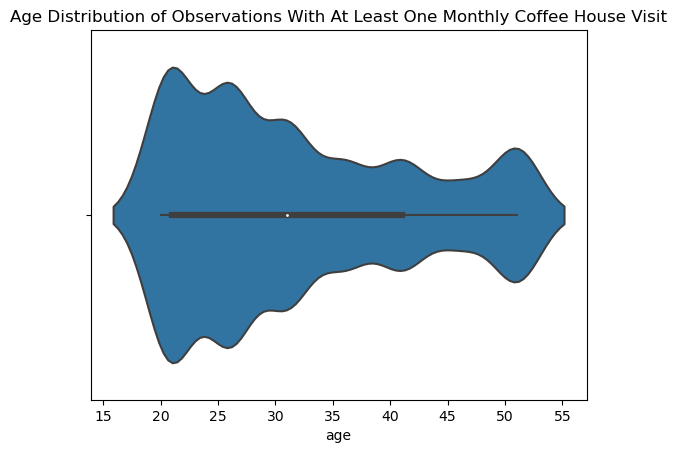

In [130]:
fig = sns.violinplot(data=visited_coffee, x='age')
fig.set_title('Age Distribution of Observations With At Least One Monthly Coffee House Visit')

It seems that are data is slightly right skewed, with younger people tending to visit a coffee house at least once per month at a higher rate. What could be the difference in ratio between the younger and older generation?

In [137]:
young_visited_coffee = visited_coffee.query('age <= 35')
old_visited_coffee = visited_coffee.query('age > 35')

accepted_young_visited_coffee = young_visited_coffee[young_visited_coffee['Y'] == '1'].size
accepted_old_visited_coffee = old_visited_coffee[old_visited_coffee['Y'] == '1'].size

accepted_young_visited_coffee_ratio = accepted_young_visited_coffee / young_visited_coffee.size
accepted_old_visited_coffee_ratio = accepted_old_visited_coffee / old_visited_coffee.size

print('Ratio of observations that accepted coupon with one monthly visit and under 35: ', accepted_young_visited_coffee_ratio)
print('Ratio of observations that accepted coupon with one monthly visit and over 35: ', accepted_old_visited_coffee_ratio)

Ratio of observations that accepted coupon with one monthly visit and under 35:  0.6051091005854178
Ratio of observations that accepted coupon with one monthly visit and over 35:  0.5763688760806917


Age does not seem to have a large impact on the rate that someone accepts a coupon, given that they have at least 1 monthly coffee house visit. Those under 35 do have a slightly higher percentage accepting the coupon compared to those over 35.

[Text(0.5, 0, 'Monthly Coffee House Visits'),
 Text(0.5, 1.0, 'Acceptance of Coffee House Coupons by Monthly Visits')]

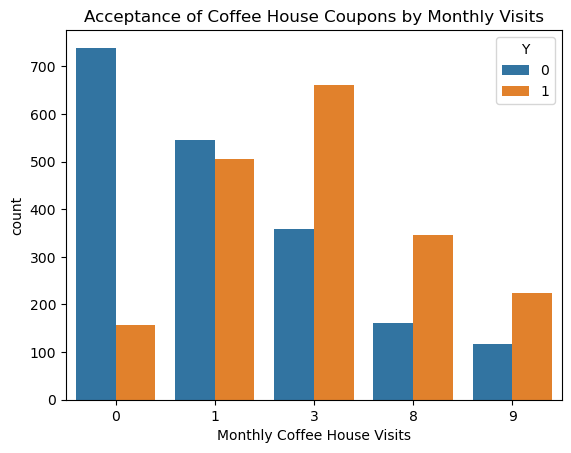

In [138]:
fig = sns.countplot(coffee_data, x='CoffeeHouse', hue='Y')
fig.set(xlabel='Monthly Coffee House Visits', title='Acceptance of Coffee House Coupons by Monthly Visits')

We can clearly see that coffee house visits has a tremendous impact on the rate of coupon acceptance. Increasing amounts of monthly coffee house visits is shown in the above graph to dramatically increase the ratio of those who accept a coupon versus those who don't. We also explored the effect that age can have on the acceptance. We saw that age does not have a considerable impact on the rate of acceptance, but maybe a different threshold that defined "young" vs "old" can be explored for a different result.